In [3]:
from rt_utils import RTStructBuilder
import matplotlib.pyplot as plt
%run DICOMReader.ipynb import DICOMReader
import os

In [4]:
dicom_series_CT = "/Users/wangyangwu/Documents/Maastro/NeuralNets/PROTON/P0439C0006I1473766/CT/1.3.6.1.4.1.32722.228.6.63207665478764726756566005696578074318"
# dicom_sries_Dose = "/Users/wangyangwu/Documents/Maastro/NeuralNets/PROTON/P0439C0006I1473766/RTDOSE/1.3.6.1.4.1.32722.228.6.334797647287977966709364212462384620209/1.3.6.1.4.1.32722.228.6.36725526625681761397802081573539292769.dcm"
struct = "/Users/wangyangwu/Documents/Maastro/NeuralNets/PROTON/P0439C0006I1473766/RTSTRUCT/1.3.6.1.4.1.32722.228.6.133467612907209240084942361415930368581/1.3.6.1.4.1.32722.228.6.113839825936852261690866610346783936763.dcm"

In [5]:
rtstruct = RTStructBuilder.create_from(
  dicom_series_path=dicom_series_CT, 
  rt_struct_path=struct
)

In [6]:
print(rtstruct.get_roi_names())

['Heart', 'CTVp1_05', 'GTVp1', 'Spinal Cord', 'Esophagus', 'Lung R', 'Lung L', 'BODY1', 'MediastEnvelop', 'MedEnv_05', 'Lungs-GTV1', 'Carina', 'Carina_2', 'Spinal Cord_3', 'External', 'CTVp1_05_03', 'CTV1', 'Lung L-CTV_03', 'Pillow_Lung', 'Lung_treatment_T', 'Heart_ex5', 'CTV_inMedEnv', 'max regressie', '95', 'med env_05overla', 'isogem', 'mid_2', 'mid_0', 'mid_1', 'isogem (1)', 'mid_2 (1)', 'mid_0 (1)', 'mid_1 (1)', 'isogem (2)', 'mid_2 (2)', 'mid_0 (2)', 'mid_1 (2)']


## HEART

In [7]:
import numpy as np
## render mask layer
mask_3d_heart = rtstruct.get_roi_mask_by_name("Lungs-GTV1")
m = mask_3d_heart.astype(int)

In [8]:
m.shape

(512, 512, 189)

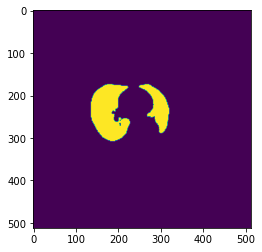

In [9]:
plt.imshow(m[:,:,60])

In [37]:
# #==================================
# import nibabel as nib
# import numpy as np
# import matplotlib.pyplot as plt
# #==================================
# # load image (4D) [X,Y,Z_slice,time]
# nii_img  = nib.load('/Users/wangyangwu/Documents/Maastro/NeuralNets/PROTON/P0439C0006I3038573/CT/0_ave8_1_2_3_4_5_6_8_50_.nii.gz')
# nii_data = nii_img.get_fdata()

In [10]:
import nrrd
readdata, header = nrrd.read("/Users/wangyangwu/Documents/Maastro/NeuralNets/PROTON/P0439C0006I1473766/RTSTRUCT/1.3.6.1.4.1.32722.228.6.133467612907209240084942361415930368581/1.nrrd")

In [20]:
readdata = readdata.transpose().shape.tolist()

AttributeError: 'tuple' object has no attribute 'transpose'

In [19]:
type(readdata)

tuple

In [18]:
## heart axial plane
## overlay visualization
for i in range(34,50):
    fig = plt.figure(frameon=False)
#     img1 = plt.imshow(m[:,:,i], cmap="gray")
    img2 = plt.imshow(readdata[:,:,i], alpha=0.5)
    plt.show()

TypeError: tuple indices must be integers or slices, not tuple

<Figure size 432x288 with 0 Axes>

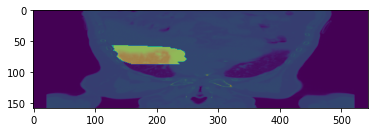

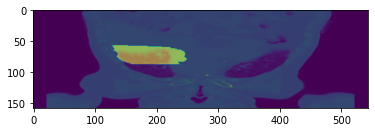

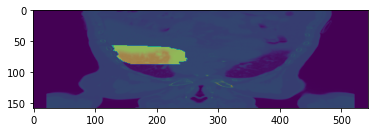

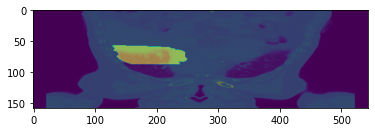

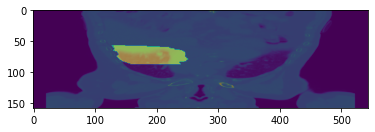

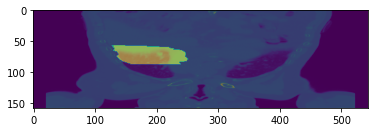

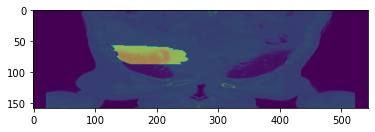

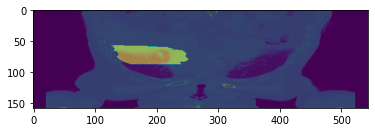

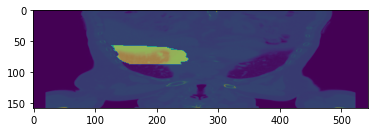

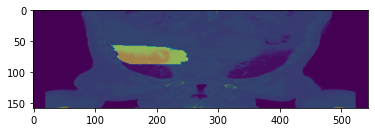

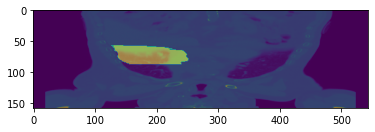

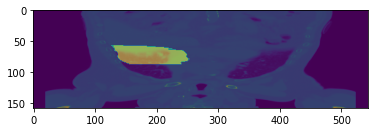

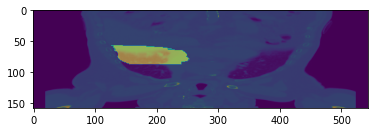

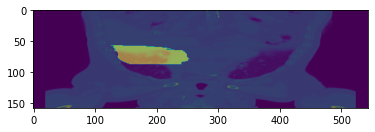

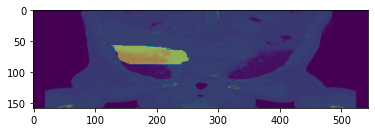

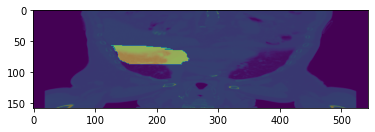

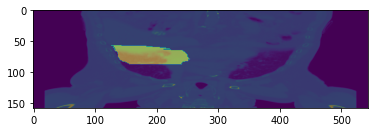

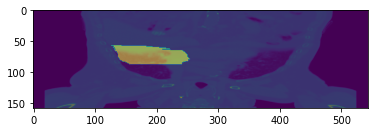

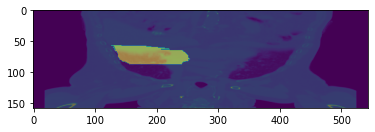

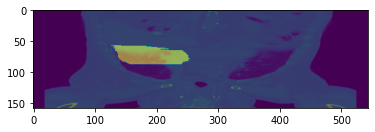

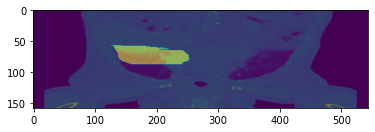

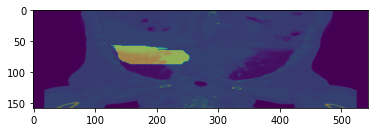

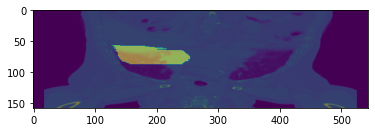

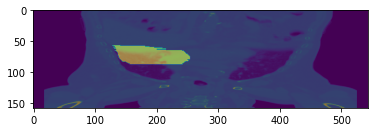

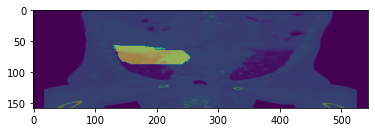

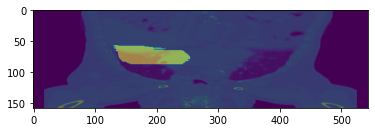

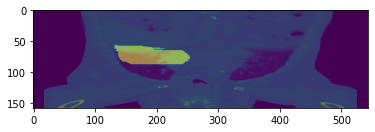

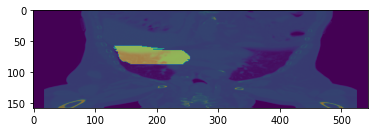

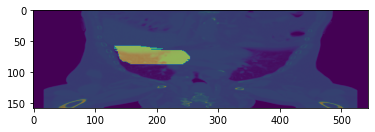

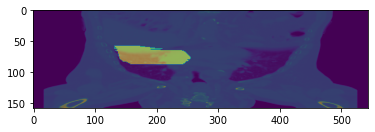

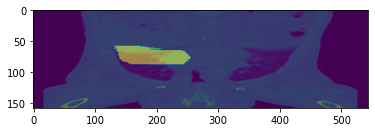

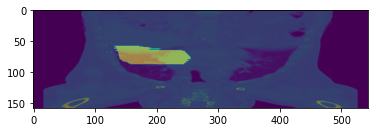

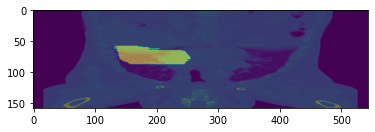

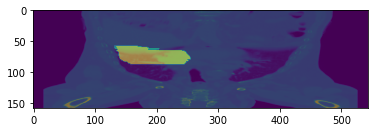

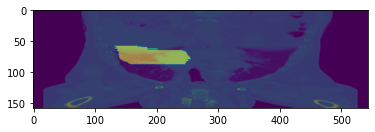

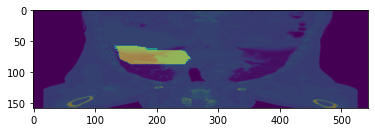

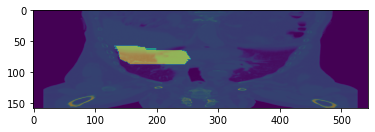

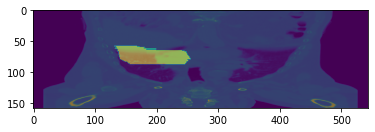

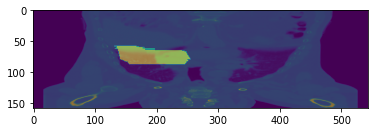

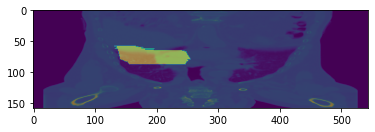

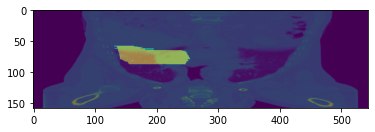

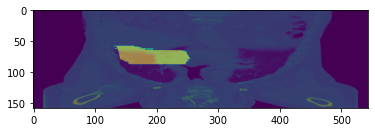

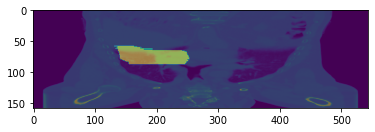

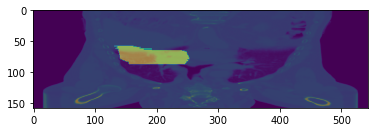

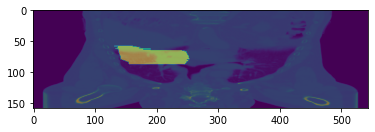

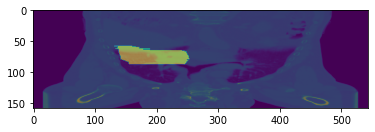

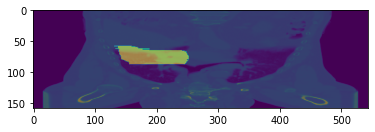

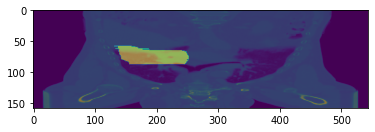

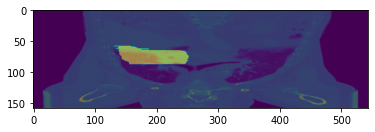

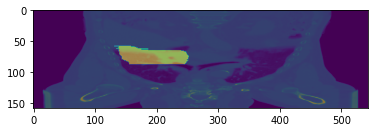

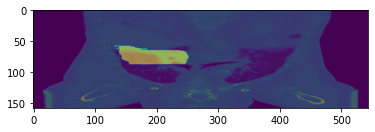

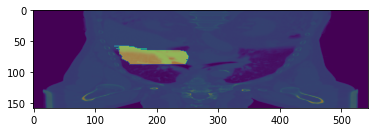

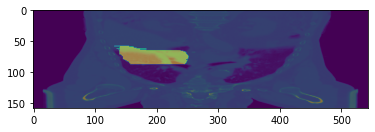

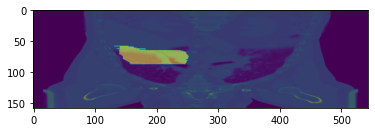

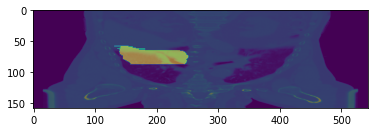

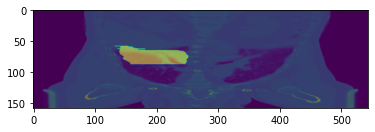

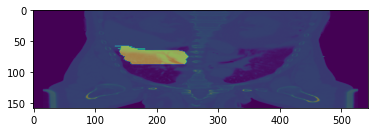

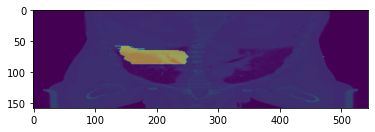

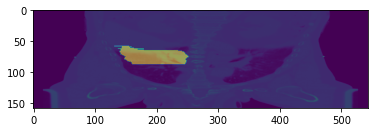

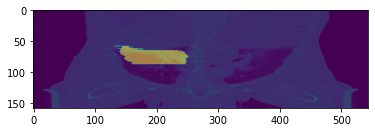

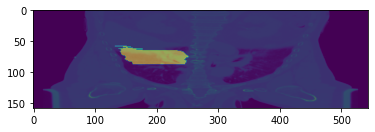

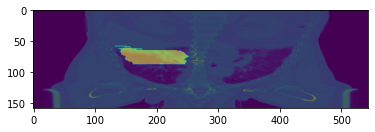

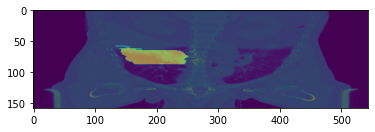

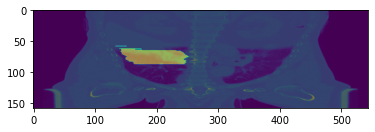

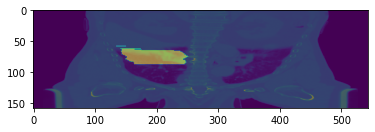

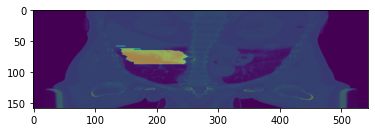

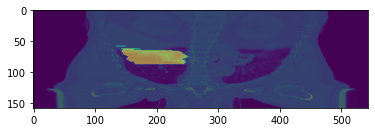

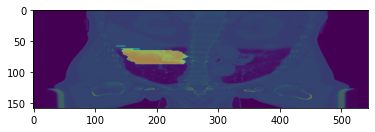

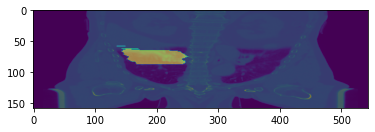

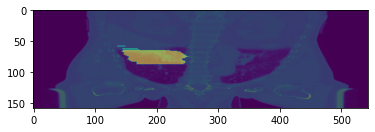

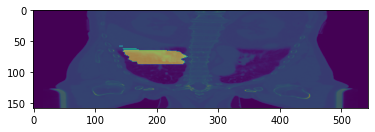

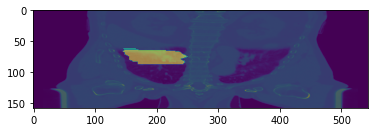

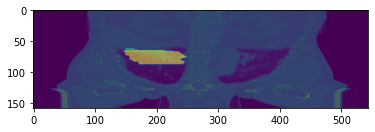

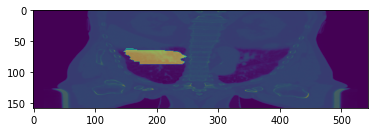

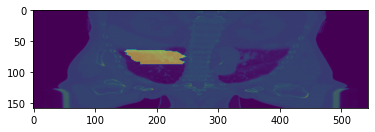

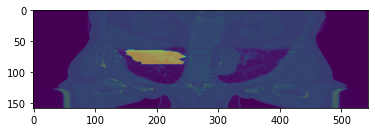

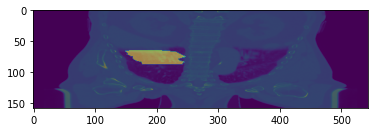

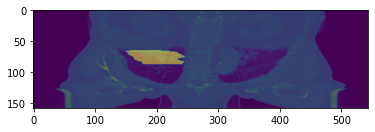

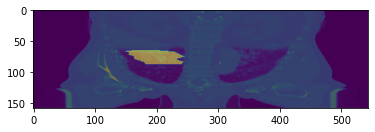

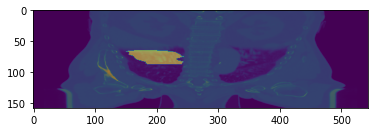

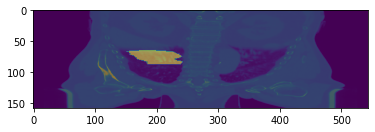

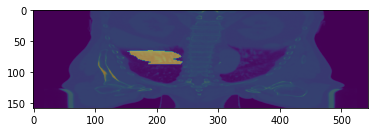

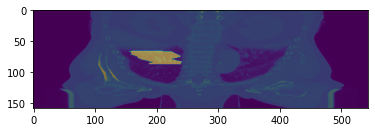

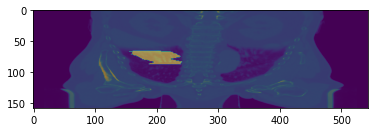

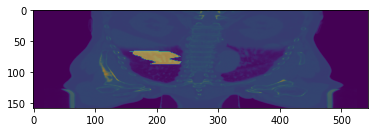

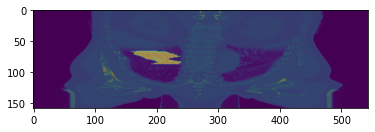

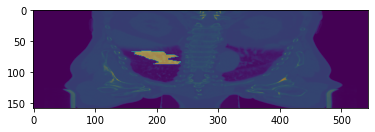

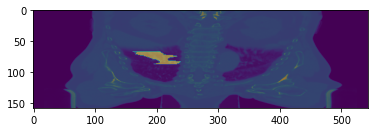

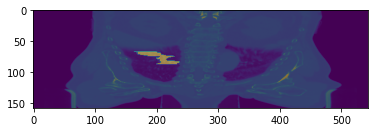

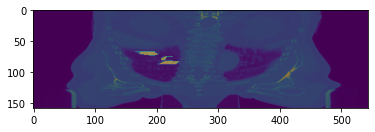

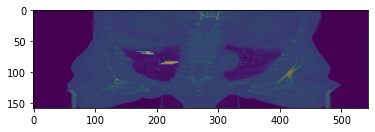

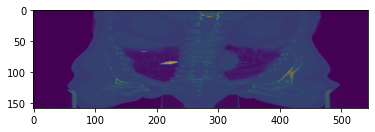

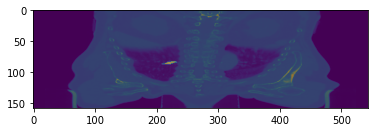

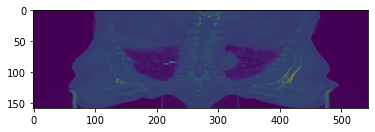

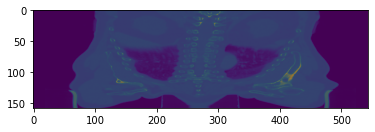

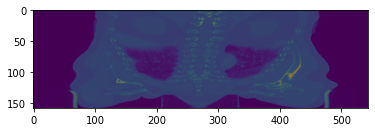

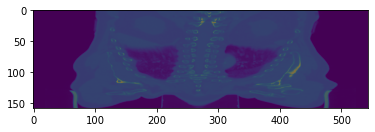

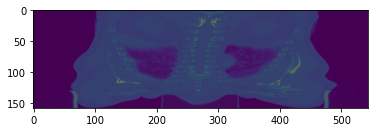

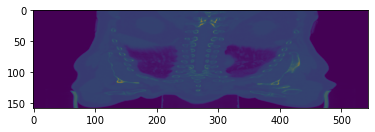

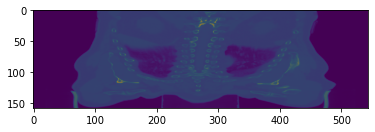

In [55]:
## Heart coronal plane (upside down)
## overlay visualization
for i in range(200,300):
    fig = plt.figure(frameon=False)
    img1 = plt.imshow(mm[:,i,:])
    img2 = plt.imshow(CT[:,i,:],alpha=0.5)
    plt.show()

## LUNGS-GTV1

In [199]:
## render mask layer
mask_3d_lungsGTV1 = rtstruct.get_roi_mask_by_name("Lungs-GTV")
mml = mask_3d_lungsGTV1.astype(int)


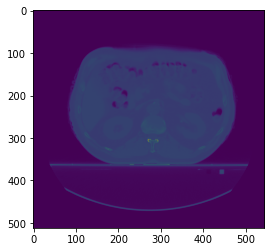

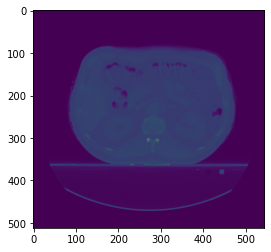

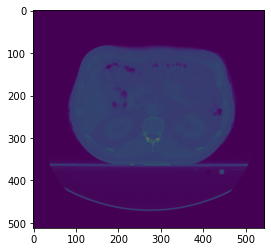

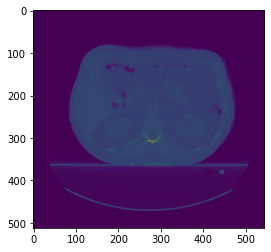

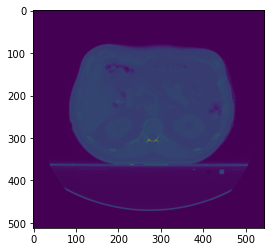

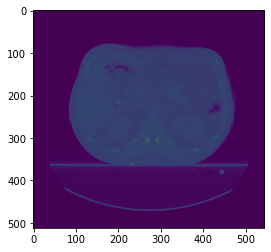

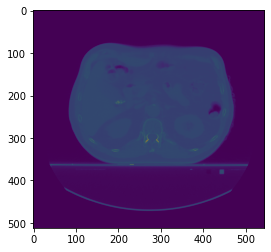

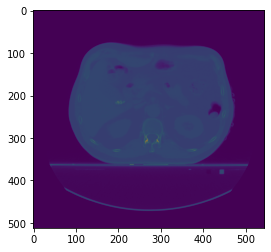

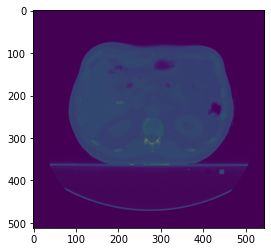

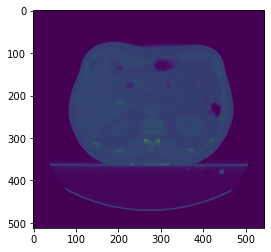

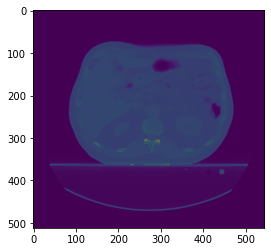

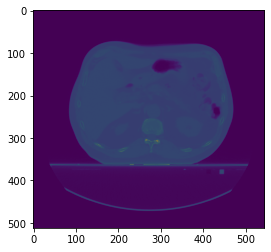

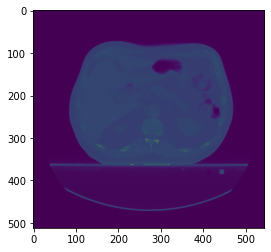

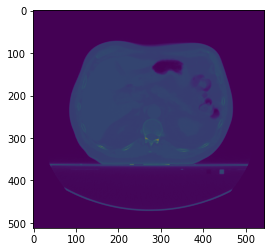

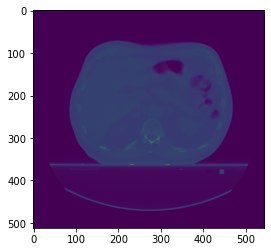

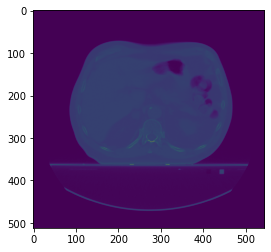

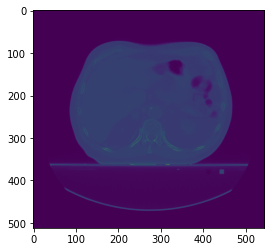

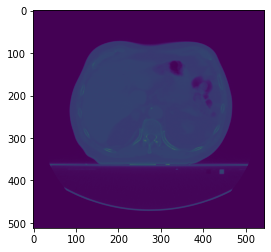

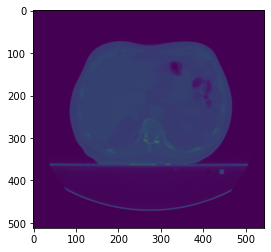

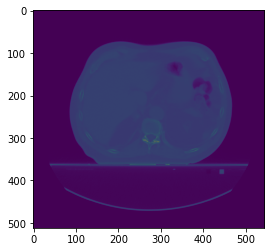

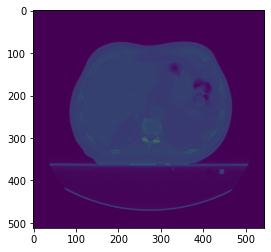

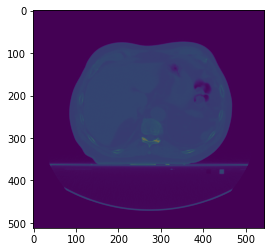

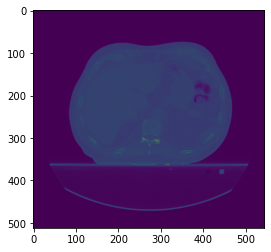

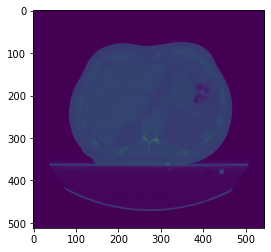

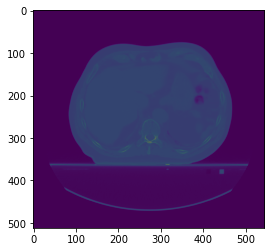

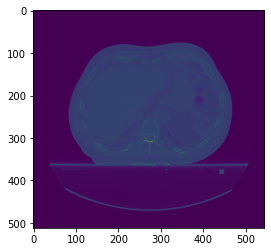

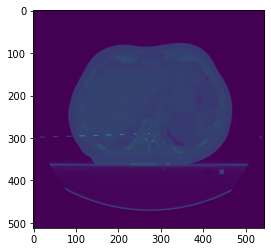

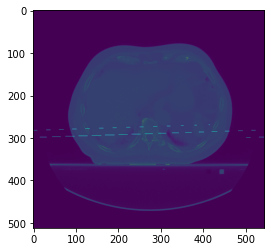

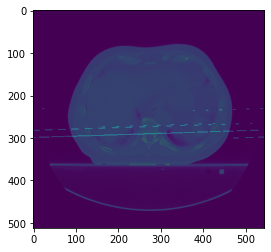

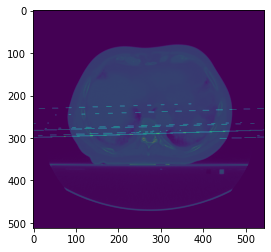

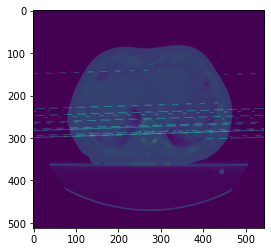

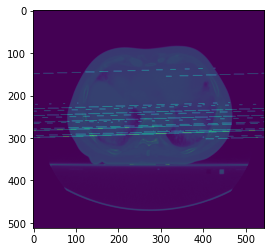

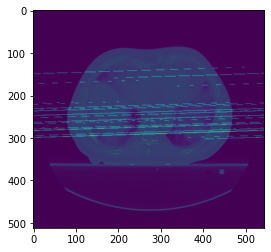

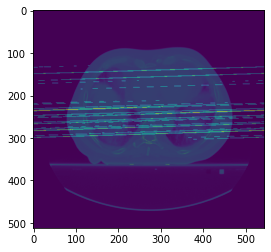

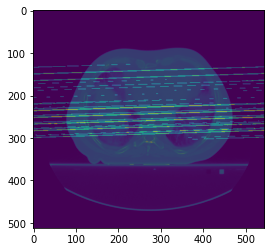

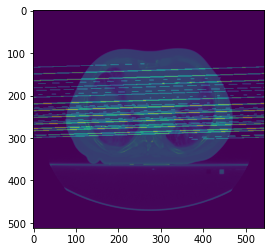

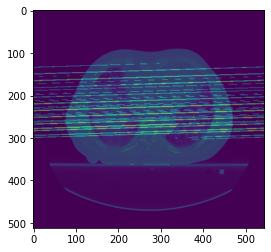

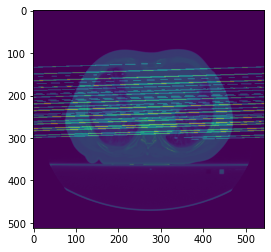

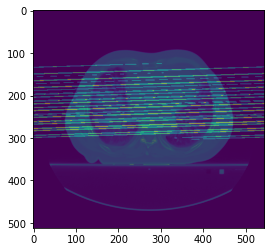

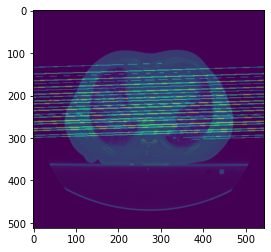

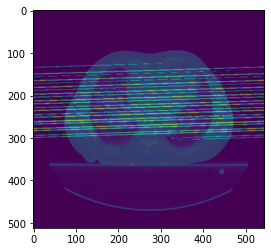

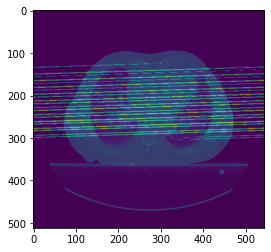

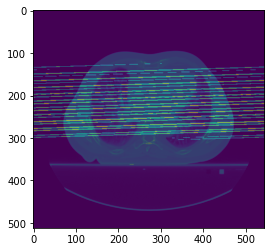

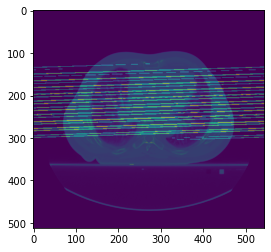

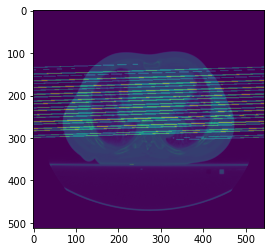

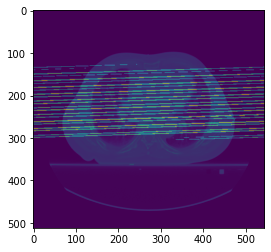

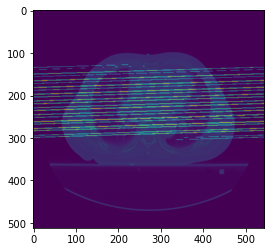

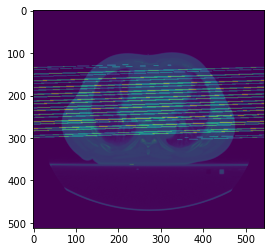

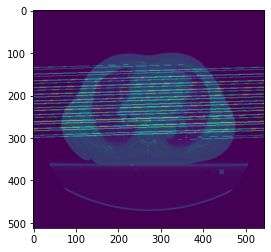

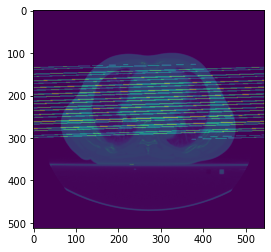

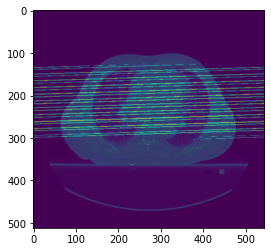

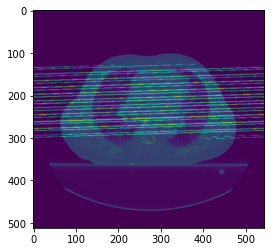

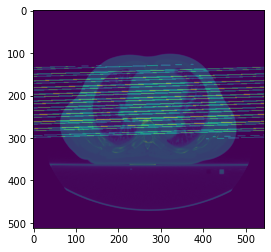

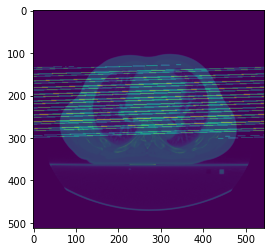

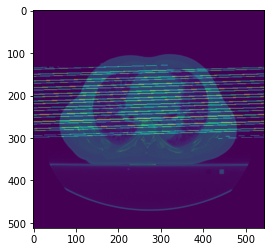

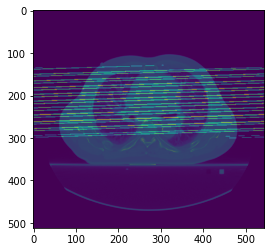

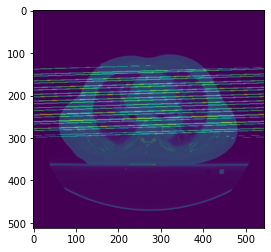

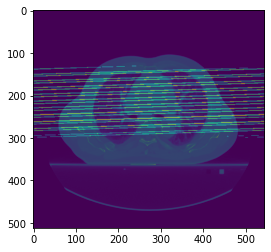

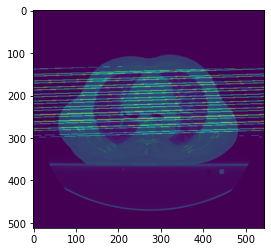

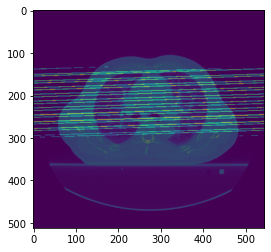

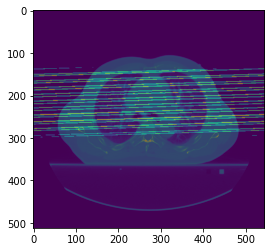

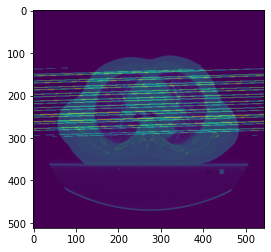

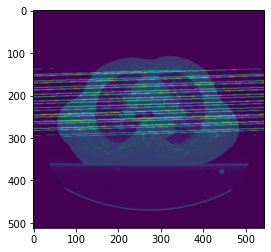

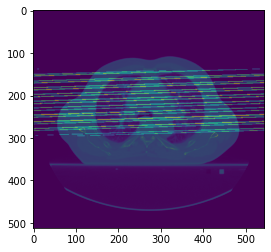

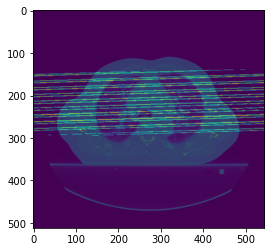

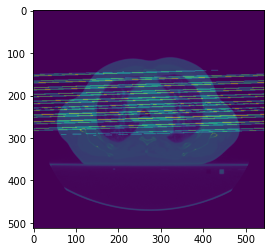

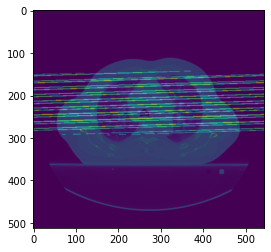

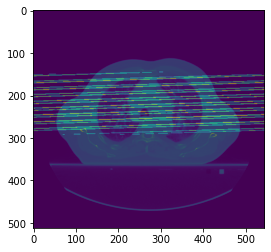

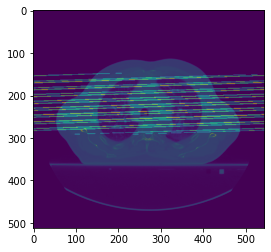

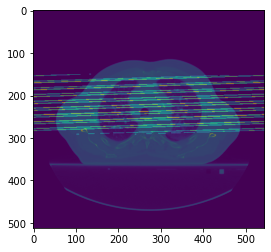

In [201]:
## Lung GTV1 axial plane
## overlay visualization
for i in range(30,100):
    fig = plt.figure(frameon=False)
    img1 = plt.imshow(mml[:,:,i])
    img2 = plt.imshow(CT[i,:,:], alpha=0.5)
    plt.show()

In [151]:
## lung GTV1 coronal plane
## overlay visualization
for i in range(200,350):
    fig = plt.figure(frameon=False)
    img1 = plt.imshow(mmm[i,:,:].T)
    img2 = plt.imshow(CT[:,i,:], alpha=0.5)
    plt.show()

IndexError: index 200 is out of bounds for axis 0 with size 159

<Figure size 432x288 with 0 Axes>

In [1]:
path = "/Users/wangyangwu/Documents/Maastro/NeuralNets/PROTON/P0439C0006I1473766/RTPLAN/1.3.6.1.4.1.32722.228.6.325532840834941086293153567721883963193/1.3.6.1.4.1.32722.228.6.313844532121869153388299621581934496436.dcm"

In [2]:
import pydicom